In [28]:
import pandas as pd
import tushare as ts
import datetime
import matplotlib
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ochl
import matplotlib.ticker as ticker

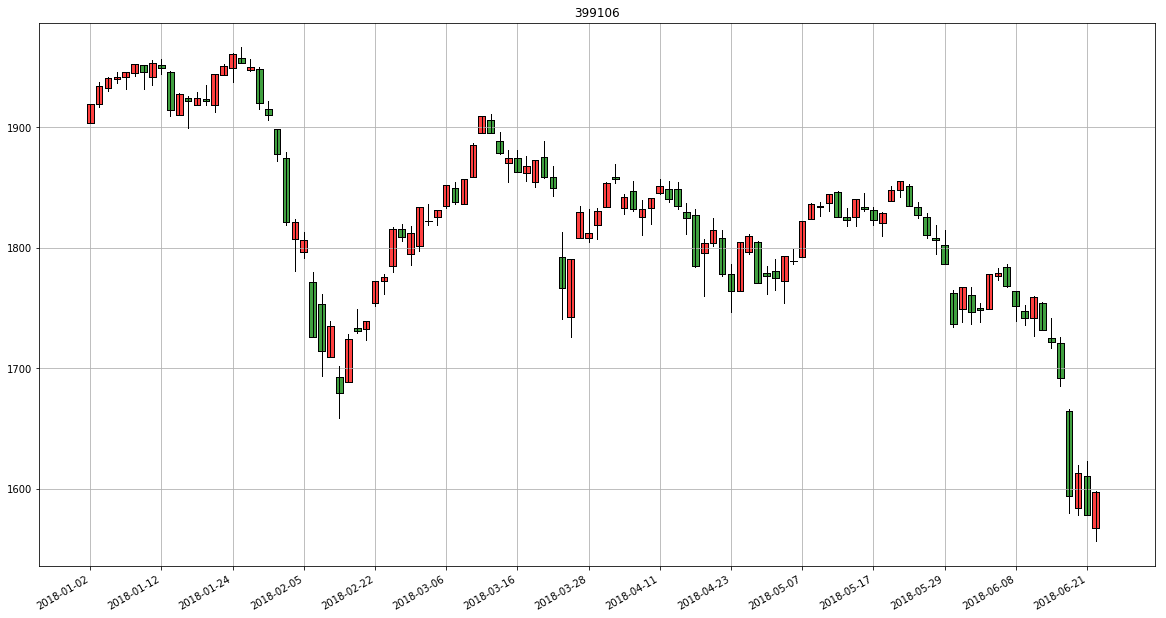

In [40]:
begin_date = '2018-01-01'
end_date = '2018-06-25'
code = "399106" #399106深证综指 #000001上证指数
df = ts.get_hist_data(code, start = begin_date, end = end_date)
df = df.sort_index(0)
df_idx = df.index.values

# df.plot()

fig, ax = plt.subplots(figsize=(20, 10)) # 设置图片大小。
# https://matplotlib.org/api/finance_api.html#module-matplotlib.finance
# matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g', alpha=0.75)
candlestick2_ochl(ax = ax, opens=df["open"].values, closes=df["close"].values, highs=df["high"].values, lows=df["low"].values, width=0.75, colorup='r', colordown='g', alpha=0.75)

ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
# 设置自动格式化时间。
def mydate_formatter(x,pos):
    try:
        return df_idx[int(x)]
    except IndexError:
        return ''
ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))

plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
ax.grid(True)
plt.title(code)
plt.show()

In [30]:
df = ts.get_index() # 获取大盘指数实时行情列表
df = pd.DataFrame(df)
select = ['上证指数', '深证综指', '沪深300', '创业板指']
df = df.loc[df['name'].isin(select)]
df

,code,name,change,open,preclose,close,high,low,volume,amount
0,000001,上证指数,0.36,2903.4495,2889.7603,2900.1191,2908.6240,2895.2563,28703368,299.4795
10,000300,沪深300,0.40,3625.7984,3608.9046,3623.2576,3631.0253,3614.2362,19094831,252.3667
17,399006,创业板指,0.89,1563.7440,1549.6610,1563.4890,1566.7770,1556.7750,278743943,39.2135
21,399106,深证综指,0.80,1608.2510,1597.3910,1610.1490,1612.5080,1604.7660,4110054695,475.9776


In [39]:
select = ['code', 'name', 'pre_close', 'price', 'high', 'low', 'volume', 'amount', 'time', 'date']
pingan = ts.get_realtime_quotes('601318').loc[:, select]
moutai = ts.get_realtime_quotes('600519').loc[:, select]
cmb = ts.get_realtime_quotes('600036').loc[:, select]
midea = ts.get_realtime_quotes('000333').loc[:, select]
cib = ts.get_realtime_quotes('601166').loc[:, select]
gree = ts.get_realtime_quotes('000651').loc[:, select]
vanke = ts.get_realtime_quotes('000002').loc[:, select]
cmbc = ts.get_realtime_quotes('600016').loc[:, select]
yili = ts.get_realtime_quotes('600887').loc[:, select]
wuliangye = ts.get_realtime_quotes('000858').loc[:, select]
spdb = ts.get_realtime_quotes('600000').loc[:, select]
citics = ts.get_realtime_quotes('600030').loc[:, select]
ab = ts.get_realtime_quotes('601288').loc[:, select]
hrs = ts.get_realtime_quotes('600276').loc[:, select]
icbc = ts.get_realtime_quotes('601398').loc[:, select]
# A50 = pingan.append(moutai)
A50 = pd.concat([pingan, moutai, cmb, midea, cib, gree, vanke, cmbc, yili, wuliangye, spdb, hrs, citics, ab, icbc], axis = 0)
A50

,code,name,pre_close,price,high,low,volume,amount,time,date
0,601318,中国平安,61.070,61.020,61.350,60.900,11386532,696399630.000,09:59:45,2018-06-25
0,600519,贵州茅台,766.530,774.730,778.780,764.900,1076129,832636999.000,09:59:45,2018-06-25
0,600036,招商银行,28.620,28.410,28.710,28.350,9770863,279092426.000,09:59:45,2018-06-25
0,000333,美的集团,53.650,53.890,54.140,52.960,8054982,432036909.170,09:59:48,2018-06-25
0,601166,兴业银行,15.150,15.120,15.260,15.110,9161129,139170826.000,09:59:48,2018-06-25
0,000651,格力电器,48.060,48.860,48.990,48.250,19071999,927953792.720,09:59:48,2018-06-25
0,000002,万 科Ａ,28.100,27.870,28.380,27.810,14169739,397813927.050,09:59:48,2018-06-25
0,600016,民生银行,7.240,7.230,7.280,7.210,10685846,77549991.000,09:59:48,2018-06-25
0,600887,伊利股份,29.660,29.630,30.000,29.530,12209999,363541446.000,09:59:48,2018-06-25
0,000858,五 粮 液,80.180,83.000,83.550,81.020,13104235,1079462031.510,09:59:48,2018-06-25
